**Loading data from csv**


In [1]:
import pandas as pd

In [2]:
sp500 = pd.read_csv('GSPC.csv',na_values=['null'],na_filter=True).set_index('Date')
dax = pd.read_csv('GDAXI.csv',na_values=['null'],na_filter=True).set_index('Date')
nikkei225 = pd.read_csv('N225.csv',na_values=['null'],na_filter=True).set_index('Date')

** Preprocessing data **

In [3]:
from pandas.tools.plotting import autocorrelation_plot
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
closed_data = pd.DataFrame()
closed_data['sp_closed'] = sp500['Adj Close']
closed_data['dax_closed'] = dax['Adj Close']
closed_data['n225_closed'] = nikkei225['Adj Close']
closed_data = closed_data.fillna(method='ffill').dropna()

In [5]:
#closed_data.describe()
closed_data.head()

,sp_closed,dax_closed,n225_closed
Date,,,
2007-01-04,1418.339966,6674.399902,17353.669922
2007-01-05,1409.709961,6593.089844,17091.589844
2007-01-08,1412.839966,6607.589844,17091.589844
2007-01-09,1412.109985,6614.370117,17237.769531
2007-01-10,1414.849976,6566.560059,16942.400391


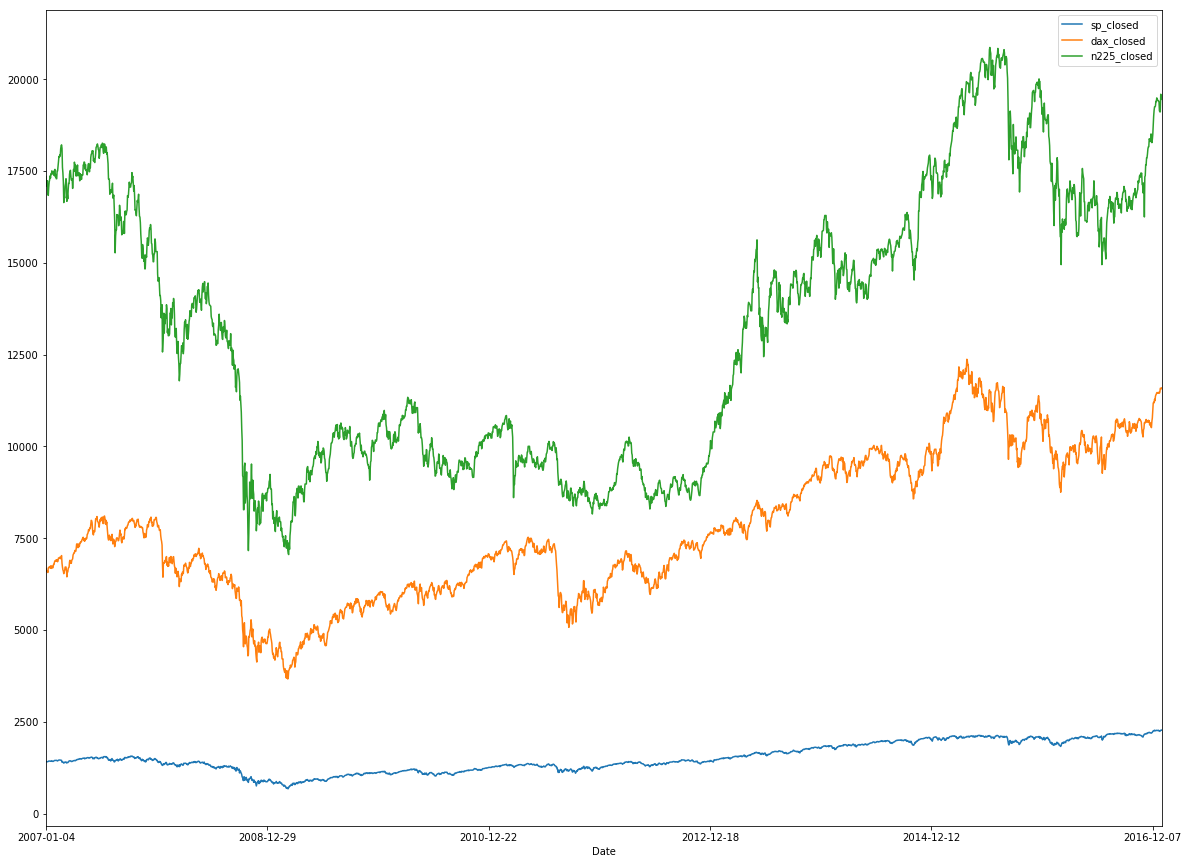

In [6]:
# N.B. A super-useful trick-ette is to assign the return value of plot to _ 
# so that you don't get text printed before the plot itself.
_ = pd.concat([closed_data['sp_closed'],closed_data['dax_closed'],closed_data['n225_closed']], 
              axis=1).plot(figsize=(20, 15))

In [7]:
closed_data['sp_closed_scaled'] = closed_data['sp_closed']/max(closed_data['sp_closed'])
closed_data['dax_closed_scaled'] = closed_data['dax_closed']/max(closed_data['dax_closed'])
closed_data['n225_closed_scaled'] = closed_data['n225_closed']/max(closed_data['n225_closed'])

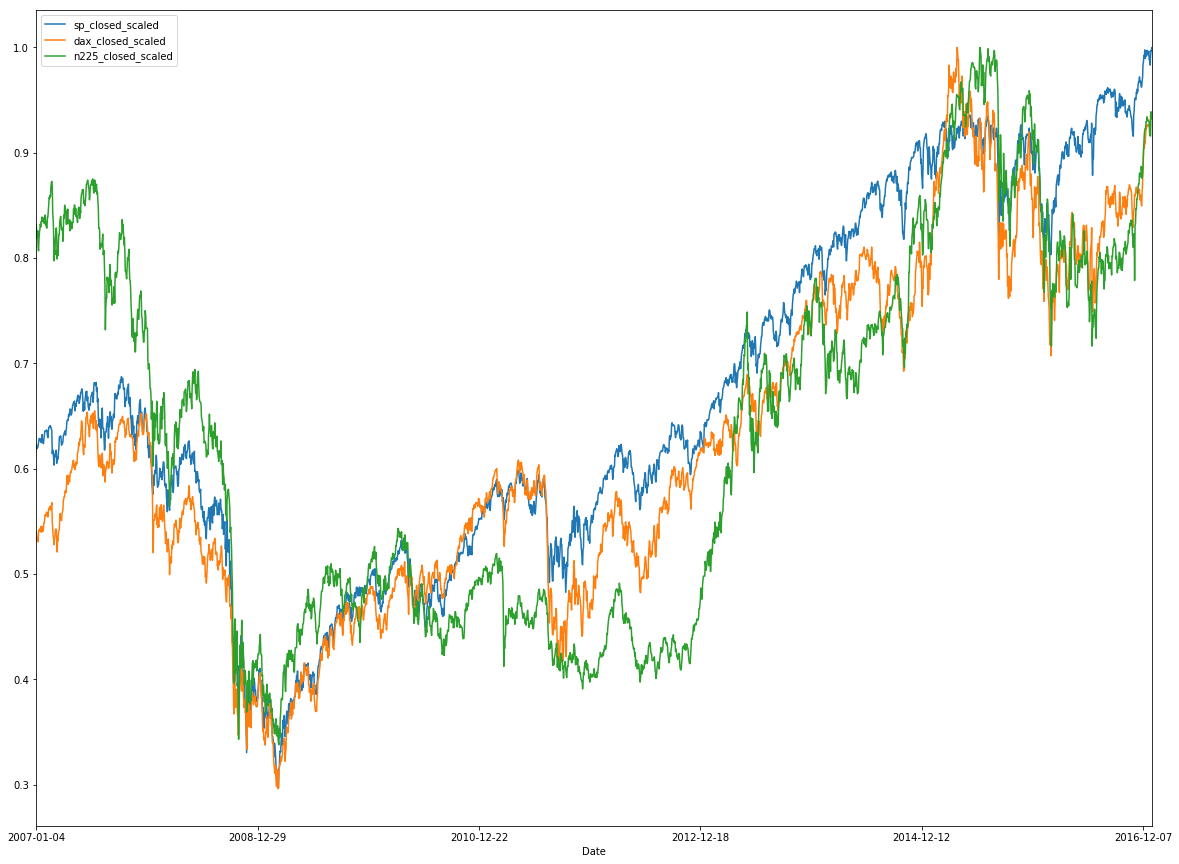

In [8]:
_ = pd.concat([closed_data['sp_closed_scaled'],closed_data['dax_closed_scaled'],closed_data['n225_closed_scaled']], 
              axis=1).plot(figsize=(20, 15))

** Autocorrelation Plot **

/Users/jiqisun/miniconda2/envs/udacity/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  after removing the cwd from sys.path.
/Users/jiqisun/miniconda2/envs/udacity/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """
/Users/jiqisun/miniconda2/envs/udacity/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


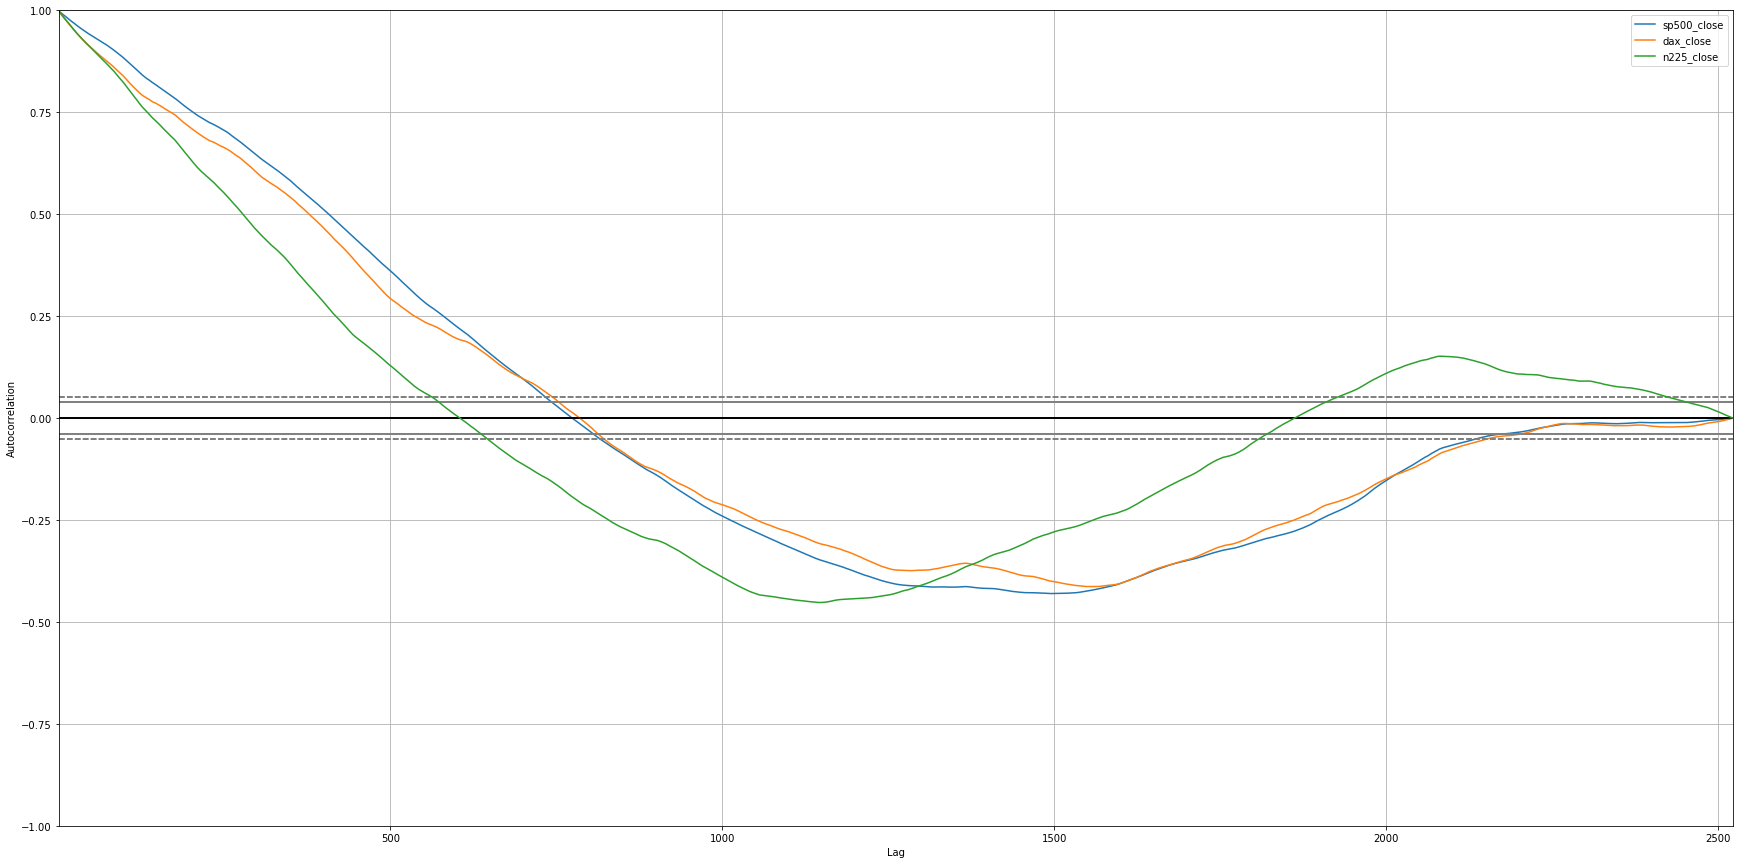

In [9]:
fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(15)
_ = autocorrelation_plot(closed_data['sp_closed'], label='sp500_close')
_ = autocorrelation_plot(closed_data['dax_closed'], label='dax_close')
_ = autocorrelation_plot(closed_data['n225_closed'], label='n225_close')
_ = plt.legend(loc='upper right')

/Users/jiqisun/miniconda2/envs/udacity/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


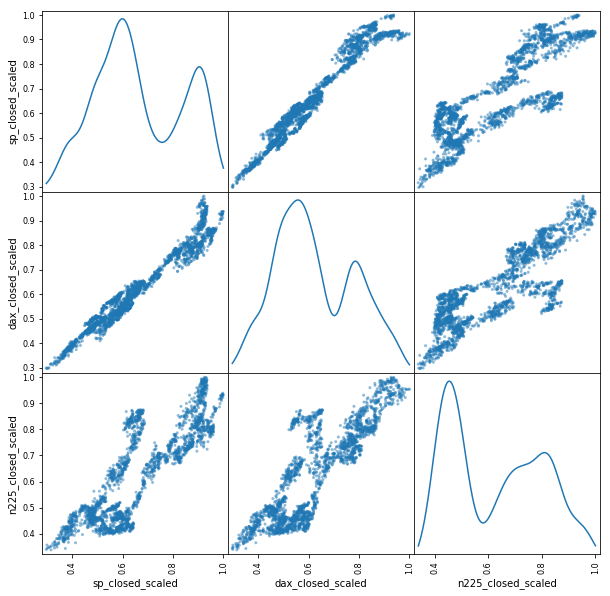

In [10]:
_ = scatter_matrix(pd.concat([closed_data['sp_closed_scaled'],
  closed_data['dax_closed_scaled'],
  closed_data['n225_closed_scaled']
  ], axis=1), figsize=(10, 10), diagonal='kde')

** Data Transform **

In [11]:
log_return = pd.DataFrame()
log_return['sp'] = np.log(closed_data['sp_closed']/closed_data['sp_closed'].shift())
log_return['dax'] = np.log(closed_data['dax_closed']/closed_data['dax_closed'].shift())
log_return['n225'] = np.log(closed_data['n225_closed']/closed_data['n225_closed'].shift())
#log_return = log_return.dropna()
#log_return.describe()
log_return.head()

,sp,dax,n225
Date,,,
2007-01-04,NaN,NaN,NaN
2007-01-05,-0.006103,-0.012257,-0.015217
2007-01-08,0.002218,0.002197,0.000000
2007-01-09,-0.000517,0.001026,0.008516
2007-01-10,0.001938,-0.007254,-0.017284


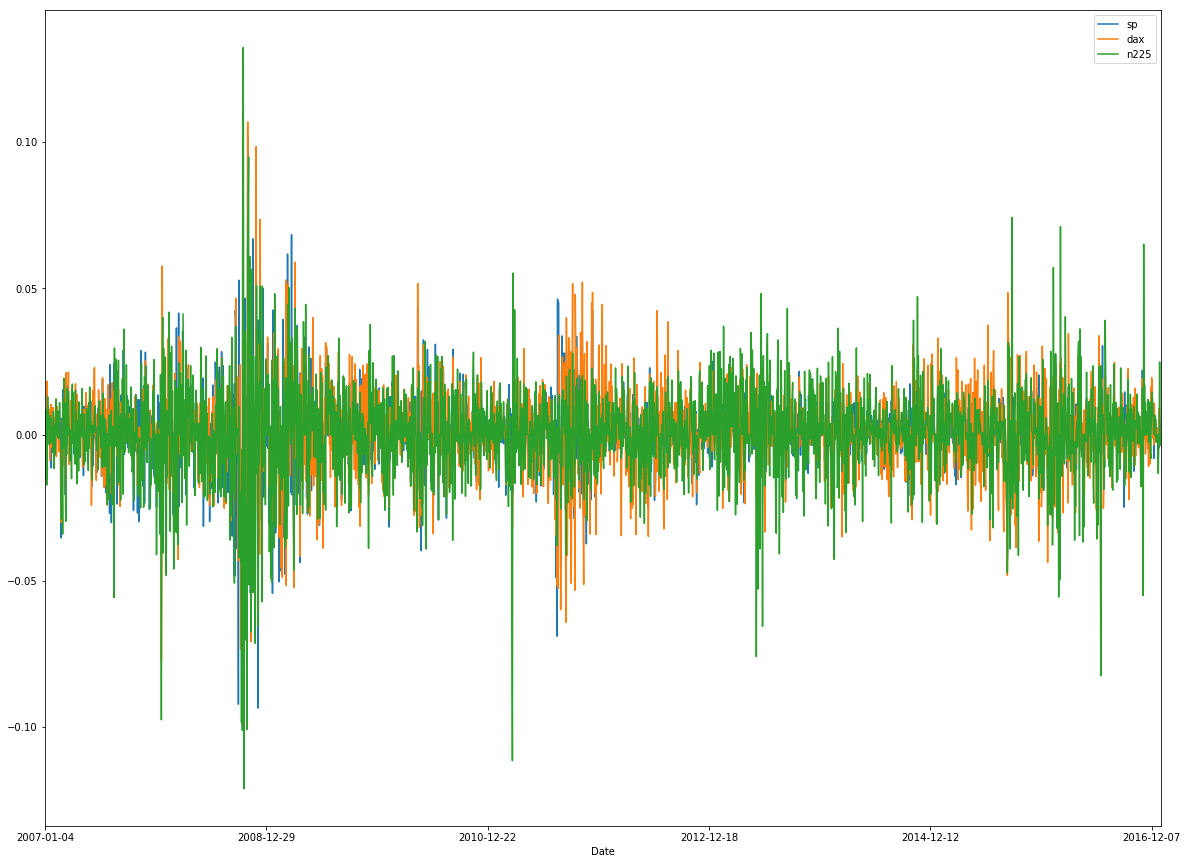

In [12]:
_ = pd.concat([log_return['sp'],log_return['dax'],log_return['n225']],axis=1).plot(figsize=(20,15))

/Users/jiqisun/miniconda2/envs/udacity/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


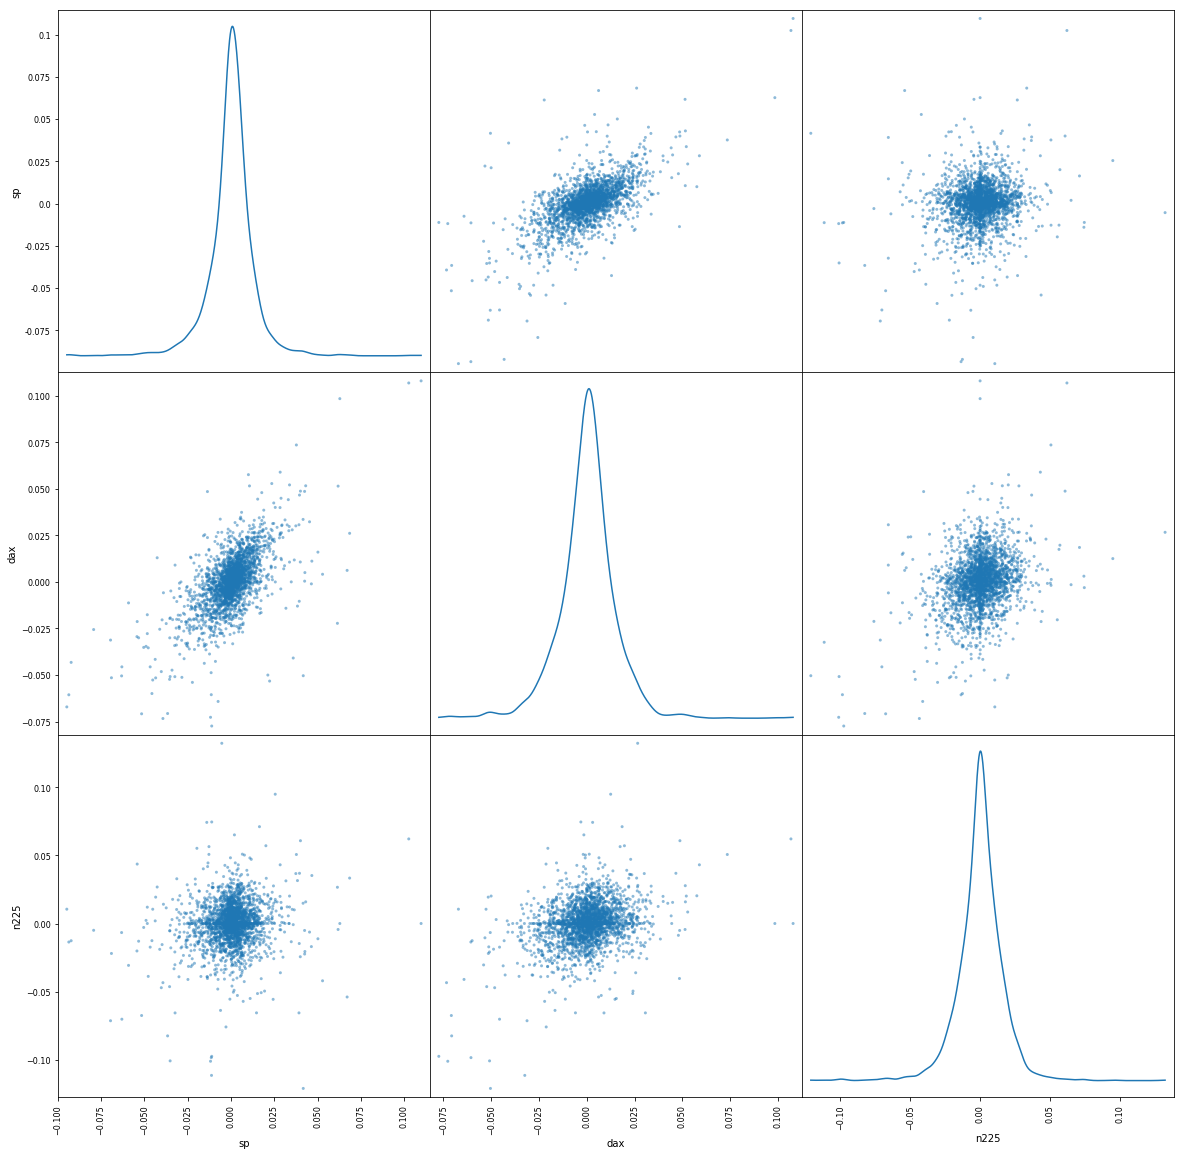

In [13]:
_ = scatter_matrix(log_return, figsize=(20, 20), diagonal='kde')

** Set-up Train test dataset **

In [14]:
# set label to 1 if sp greater than 0 otherwise to 0
log_return['sp_postive'] = log_return['sp'].apply(lambda x: 1 if x>0 else 0)
#log_return['sp_negative'] = log_return['sp'].apply(lambda x: 1 if x<0 else 0)
log_return.head()
#log_return.tail()

,sp,dax,n225,sp_postive
Date,,,,
2007-01-04,NaN,NaN,NaN,0
2007-01-05,-0.006103,-0.012257,-0.015217,0
2007-01-08,0.002218,0.002197,0.000000,1
2007-01-09,-0.000517,0.001026,0.008516,0
2007-01-10,0.001938,-0.007254,-0.017284,1


In [15]:
training_test_data = pd.DataFrame(
    columns = ['sp_positive','sp_1','sp_2','dax_0','dax_1','dax_2','n225_0','n225_1','n225_2']
)

for i in range(3,len(log_return)):
    sp_positive = log_return['sp_postive'].iloc[i]
    sp_1 = log_return['sp'].iloc[i-1]
    sp_2 = log_return['sp'].iloc[i-2]
    dax_0 = log_return['dax'].iloc[i]
    dax_1 = log_return['dax'].iloc[i-1]
    dax_2 = log_return['dax'].iloc[i-2]
    n225_0 = log_return['n225'].iloc[i]
    n225_1 = log_return['n225'].iloc[i-1]
    n225_2 = log_return['n225'].iloc[i-2]
    training_test_data = training_test_data.append(
        {'sp_positive':sp_positive,'sp_1':sp_1,'sp_2':sp_2, 'dax_0':dax_0,'dax_1':dax_1,'dax_2':dax_2,
         'n225_0':n225_0,'n225_1':n225_1,'n225_2':n225_2},
        ignore_index = True
    )
            
training_test_data.head()
#training_test_data.describe()

,sp_positive,sp_1,sp_2,dax_0,dax_1,dax_2,n225_0,n225_1,n225_2
0,0.0,0.002218,-0.006103,0.001026,0.002197,-0.012257,0.008516,0.000000,-0.015217
1,1.0,-0.000517,0.002218,-0.007254,0.001026,0.002197,-0.017284,0.008516,0.000000
2,1.0,0.001938,-0.000517,0.018220,-0.007254,0.001026,-0.006171,-0.017284,0.008516
3,1.0,0.006320,0.001938,0.002669,0.018220,-0.007254,0.012913,-0.006171,-0.017284
4,1.0,0.004841,0.006320,0.001736,0.002669,0.018220,0.008491,0.012913,-0.006171


In [16]:
#training_test_data = pd.DataFrame(
    #columns = ['sp_positive','dax_0','dax_1','dax_2','n225_0','n225_1','n225_2']
#)

#for i in range(3,len(log_return)):
    #sp_positive = log_return['sp_postive'].iloc[i]
    #sp_1 = log_return['sp'].iloc[i-1]
    #sp_2 = log_return['sp'].iloc[i-2]
    #dax_0 = log_return['dax'].iloc[i]
    #dax_1 = log_return['dax'].iloc[i-1]
    #dax_2 = log_return['dax'].iloc[i-2]
    #n225_0 = log_return['n225'].iloc[i]
    #n225_1 = log_return['n225'].iloc[i-1]
    #n225_2 = log_return['n225'].iloc[i-2]
    #training_test_data = training_test_data.append(
        #{'sp_positive':sp_positive, 'dax_0':dax_0,'dax_1':dax_1,'dax_2':dax_2,
         #'n225_0':n225_0,'n225_1':n225_1,'n225_2':n225_2},
        #ignore_index = True
   # )
        
    
#training_test_data.head()
#training_test_data.describe()

**Models**

In [17]:
from sklearn.model_selection import TimeSeriesSplit
features = training_test_data[training_test_data.columns[1:]]
label = training_test_data[training_test_data.columns[:1]]
tscv = TimeSeriesSplit(n_splits=3)
for train_index,test_index in tscv.split(label):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = label.iloc[train_index], label.iloc[test_index] 
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1890 samples.
Testing set has 629 samples.


In [18]:
n_records = label.index.shape[0]
n_positive = label[label.sp_positive==1].shape[0]
n_negative = label[label.sp_positive==0].shape[0]
positive_percent = (n_positive/np.float(n_records))*100.0
print ("Total number of records: {}".format(n_records))
print ("Days S&P 500 closed positively: {}".format(n_positive))
print ("Days S&P 500 closed negatively: {}".format(n_negative))
print ("Percentage of positive days: {:.2f}%".format(positive_percent))

Total number of records: 2519
Days S&P 500 closed positively: 1358
Days S&P 500 closed negatively: 1161
Percentage of positive days: 53.91%


In [19]:
# Naive Predictor
from sklearn.metrics import accuracy_score, fbeta_score,f1_score
accuracy = positive_percent / 100
precision = accuracy
fscore = (1 + 0.5**2) * precision *1/ (0.5**2 * precision +1 )
print ("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.5391, F-score: 0.5938]


In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression

clf_A = GradientBoostingClassifier(random_state=0)
clf_B = svm.SVC(kernel='rbf',random_state=0)
clf_C = LogisticRegression(random_state=0)

clf_A.fit(X_train,y_train.values.ravel())
y_pred = clf_A.predict(X_test)
fscore = f1_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print ("[Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

[Accuracy score: 0.6757, F-score: 0.7035]


** XGBoost **

In [81]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train.values,y_train.values)
dtest = xgb.DMatrix(X_test.values)
param = {'max_depth':2,'eta':0.5, 'silent':1,'num_class':2, 'objective':'multi:softmax' }
num_round = 13
bst = xgb.train(param, dtrain, num_round)
# make prediction
y_pred = bst.predict(dtest)
fscore = f1_score(y_test.values,y_pred)
accuracy = accuracy_score(y_test.values,y_pred)
print ("[Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

[Accuracy score: 0.7027, F-score: 0.7302]
